In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
catalog = pd.read_csv('catalogTest.csv')

In [6]:
print(catalog.columns)

Index(['satnum', 'epochyr', 'epochdays', 'jdsatepoch', 'ndot', 'nddot',
       'bstar', 'inclination', 'rightascension', 'eccentricity',
       'argofperigee', 'meanmotion', 'meananomaly'],
      dtype='object')


In [7]:
catalog.head(4)

,satnum,epochyr,epochdays,jdsatepoch,ndot,nddot,bstar,inclination,rightascension,eccentricity,argofperigee,meanmotion,meananomaly
0,5,2020,4.258084,2.458853e+06,6.181374e-12,0.0,0.000257,0.597868,0.300902,0.184552,5.741165,0.047310,0.373089
1,5,2020,5.179169,2.458854e+06,6.151074e-12,0.0,0.000258,0.597856,0.251387,0.184549,5.813491,0.047310,0.322176
2,11,2020,4.920956,2.458853e+06,8.514540e-12,0.0,0.000155,0.573664,5.465471,0.146796,0.744550,0.051704,5.723074
3,11,2020,5.173718,2.458854e+06,8.544841e-12,0.0,0.000155,0.573662,5.448909,0.146796,0.769455,0.051704,5.703399


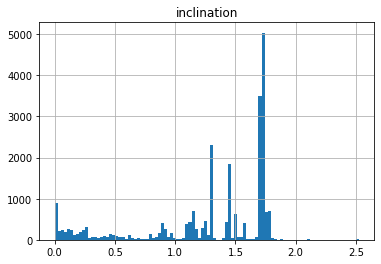

In [8]:
histIncl = catalog.hist(column='inclination',bins=100)

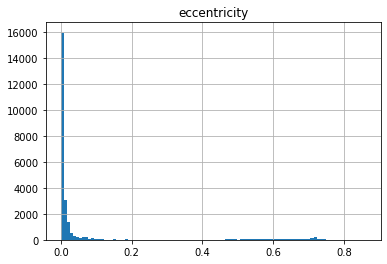

In [9]:
histIncl = catalog.hist(column='eccentricity',bins=100)

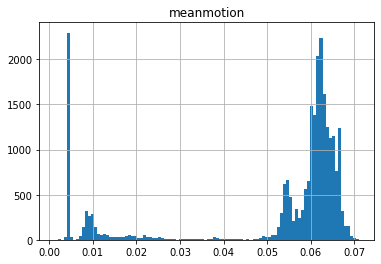

In [10]:
histMM = catalog.hist(column='meanmotion',bins=100)

In [11]:
# Create a column for orbital period and one for revs/day
# Mean Motion is the the fraction of a radian traveled in 1 minute
# Revs per day is 1440*mean_motion/2*pi
# Orbital period is 1440/revs_per_day
minutesPerDay = 1440.
catalog['revsPerDay'] = catalog['meanmotion']*minutesPerDay/(2*np.pi)
catalog['period']     = minutesPerDay/catalog['revsPerDay']

In [1]:
histPeriod = catalog.hist(column='revsPerDay',bins=100)

NameError: name 'catalog' is not defined

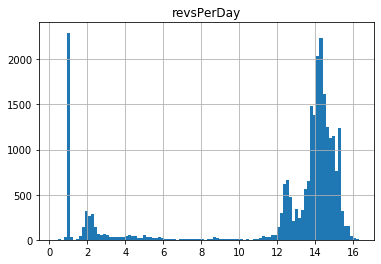

In [13]:
histRevsPerDay = catalog.hist(column='revsPerDay',bins=100)

In [14]:
# Plot the inclinaation and eccentricity of objects with ~1 rev/day
geosync = catalog[catalog['revsPerDay'] < 1.5]

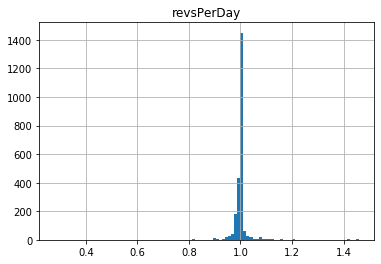

In [15]:
histGeoSync = geosync.hist(column='revsPerDay',bins=100)

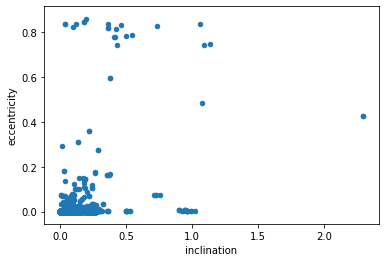

In [16]:
axGeo = geosync.plot.scatter(x='inclination',y='eccentricity')

In [17]:
geoHist, xedges, yedges = np.histogram2d(geosync['inclination'],geosync['eccentricity'])
print(geoHist)

[[1.782e+03 1.600e+01 2.000e+00 3.000e+00 2.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 7.000e+00]
 [5.040e+02 8.000e+00 2.000e+00 2.000e+00 0.000e+00 0.000e+00 2.000e+00
  0.000e+00 1.000e+00 6.000e+00]
 [8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 3.000e+00]
 [7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [1.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 2.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00 0.0

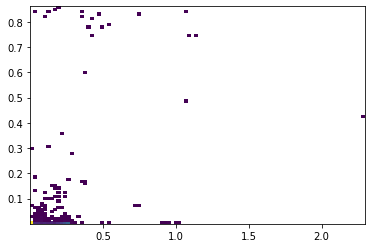

In [18]:
geohist2 = plt.hist2d(geosync['inclination'],geosync['eccentricity'],bins=100,cmin=1)


In [19]:
# Get the objects in a polar orbit
polar = catalog[catalog['inclination'] > 1.6]

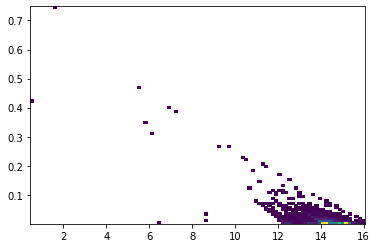

In [20]:
polarhist2 = plt.hist2d(polar['revsPerDay'],polar['eccentricity'],bins=100,cmin=1)
